# Tutorial I: Error Generation Basics

Let's start by importing some of the packages, classes and functions that we will use in the tutorial.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from dpemu.dataset_utils import load_mnist
from dpemu.filters.common import GaussianNoise, Missing
from dpemu.nodes import Array, Series

In this tutorial we will be using the famous MNIST dataset of handwritten digits. DpEmu provides a convenience function for downloading the dataset. 

In [2]:
x, y, _, _ = load_mnist()

It's a good idea to start by exploring the shape and the data type as well as the minimimun and maximum values of the input data:

In [3]:
print(f"shape: {x.shape}")
print(f"dtype: {x.dtype}")
print(f"min: {x.min()}, max: {x.max()}")

shape: (70000, 784)
dtype: float64
min: 0.0, max: 255.0


Now let's do the same for the output data:

In [4]:
print(f"shape: {y.shape}")
print(f"dtype: {y.dtype}")
print(f"min: {y.min()}, max: {y.max()}")

shape: (70000,)
dtype: int64
min: 0, max: 9


It looks like our input consists of 70000 rows where each row is a 784 pixel (i.e. 28×28) black and white image of a handwritten digit. The output corresponding to each row is its correct label.

We could works with the whole dataset, but for the purposes of this tutorial a small subset will suffice:

In [5]:
n = 1000
xs = x[:n]
ys = y[:n]

Now let's pick a data point at random and display the image and its label. 

The label of the image at index 338 is 4.


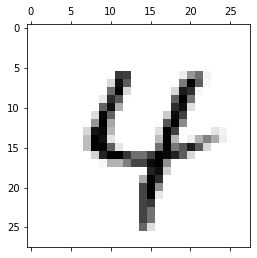

In [6]:
ind = np.random.randint(n)
plt.matshow(xs[ind].reshape((28, 28)), cmap='gray_r')
print(f"The label of the image at index {ind} is {ys[ind]}.")

Now that we know our data – superficially at least – we can start adding errors. First we must model the shape of the data as a tree. If that sounds complicated, don't worry – it's ridiculously easy!

Since the inputs are an indexed collection of images, it's natural to represent them as a series of arrays, each array corresponding to a single image. Let's do just that:

In [7]:
image_node = Array()
series_node = Series(image_node)

The Series node is the root of the tree, and the Array node is its only child.

We can now add one or more error sources. Error sources are known as Filters in dpEmu parlance, and they can be attached to Array nodes (and indeed some other kinds of nodes which we will not discuss in this tutorial). 

In [8]:
gaussian_noise_source = GaussianNoise("mean", "std")
image_node.addfilter(gaussian_noise_source)

The GaussianNoise Filter does exactly what it sounds like: it adds noise drawn from a Normal distribution. The constructor takes two String arguments – namely, identifiers for the parameters (the mean and the standard deviation) of the distribution. We will provide the values of these parameters when we want to generate the errors.

Now let's try applying our error generating tree!

In [9]:
params = {"mean": 0.0, "std": 20.0}
errorified = series_node.generate_error(xs, params)

It really is that easy! Now let's plot a random image from our errorified data subset:

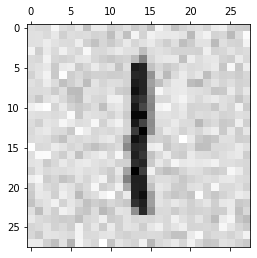

In [10]:
ind = np.random.randint(n)
plt.matshow(errorified[ind].reshape((28, 28)), cmap='gray_r')

We are not limited to one error source (i.e. Filter) per node. Let's add another one:

In [11]:
image_node.addfilter(Missing("probability", "missing_value_id"))

The Missing Filter takes each value in the array and changes it to NaN with the probability of our choice.

Now let's apply the modified error generating tree to the same subset of data:

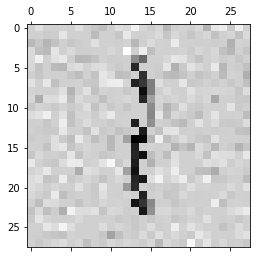

In [12]:
params = {"mean": 0.0, "std": 20.0, "probability": .3, "missing_value_id": 0}
errorified = series_node.generate_error(xs, params)

plt.matshow(errorified[ind].reshape((28, 28)), cmap='gray_r')

Congratulations! This concludes the first tutorial. There is much more to explore, but you now know enough to get started. We hope you enjoy using dpEmu!